<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

Professor. Dr. Rogério de Oliveira

TURMA 01A – MATRÍCULA 92104843
Fernando Antonio Carvalho Pessoa

Tarefa da trilha 4: Modelos Sequenciais e Classificação com Keras TensorFlow
<br>
https://github.com/Fernandopessoa1959/MACKENZIE-IA
<br>
NOTEBOOK https://github.com/Fernandopessoa1959/MACKENZIE-IA/blob/main/TRILHA_4_TAREFA_FERNANDO_PESSOA.ipynb
<br>
DATASET https://github.com/Fernandopessoa1959/MACKENZIE-IA/blob/main/MLW_Data.csv
<br>


# Introdução

Nesta tarefa devemos implementar um modelo de classificação binária ou multiclasse para um conjunto de dados `TensorFlow` e o `Keras`. 



#Dataset

O dataset escolhido é o MLW_Data, este dataset fornecido pela Agência Europeia de Ambiente, é criado a partir de um aplicativo denominado LitterWatch, que é utilizados nas comunidades costeiras da Europa para identificar o lixo jogado ao oceano.

##Fonte da base
https://www.eea.europa.eu/data-and-maps/data/marine-litter

##Visualização por TABLEAU
https://www.eea.europa.eu/themes/water/europes-seas-and-coasts/assessments/marine-litterwatch/data-and-results/marine-litterwatch-data-viewer/marine-litterwatch-data-viewer

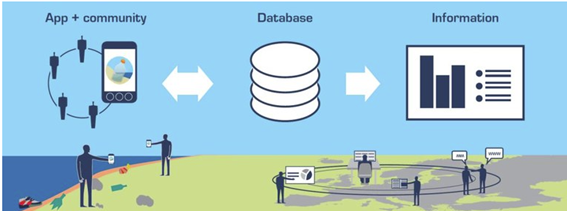<img src="c:/imagens/LitterWatch.png" width=300, align="right">


#Objetivo do modelo

Tendo o levantamento do lixo, por tipo e quantidade, localizado em cada comunidade, nosso objetivo é treinar o modelo para identificar e categoraizar o local como POLUIDO ou LIMPO

#Importando Bibliotecas

In [ ]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

#Importando datasets
Carregando os dados coletados no aplicativo e a tabela de categorias de lixo

## Base de dados do agrupamento por tipo de lixo

In [ ]:
# carregando dados de agrupamento para o Google Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
# Carregando o arquivo CSV em dataframe
Titulos = pd.read_csv('/content/MLW_Meta.csv', engine= 'python', sep = ';', encoding='utf-8')

In [ ]:
#Analise da quantidade de colunas e linhas
Titulos.shape

(164, 3)

In [ ]:
Titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   generalcode  164 non-null    object
 1   category     164 non-null    object
 2   generalname  164 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [ ]:
Titulos.head(10)

,generalcode,category,generalname
0,G1,Plastic,"4/6-pack yokes, six-pack rings"
1,G3,Plastic,Shopping Bags incl. pieces
2,G4,Plastic,"Small plastic bags, e.g. freezer bags incl. pi..."
3,G5,Plastic,Plastic bags collective role what remains from...
4,G7,Plastic,Drink bottles <=0.5l
5,G8,Plastic,Drink bottles >0.5l
6,G9,Plastic,Cleaner bottles & containers
7,G10,Plastic,Food containers incl. fast food containers
8,G11,Plastic,Beach use related cosmetic bottles and contain...
9,G12,Plastic,Other cosmetics bottles & containers


In [ ]:
Titulos.groupby('category')['category'].count()

category
Chemicals                 1
Cloth/textile            11
Glass/ceramics           10
Metal                    21
Paper/Cardboard          10
Plastic                  89
Processed/worked wood    11
Rubber                   10
unidentified              1
Name: category, dtype: int64

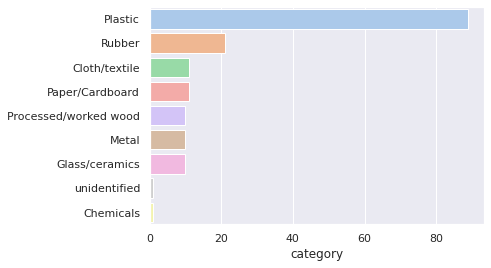

In [ ]:
sns.set(style="darkgrid")
categoria = Titulos['category'].unique()
cont = Titulos['category'].value_counts()
sns.barplot(x=cont,y=categoria, palette='pastel',orient='h');

##Base de dados da pesquisa

In [ ]:
# carregando o arquivo dados para o Google Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('/content/MLW_Data.csv', engine= 'python', sep = ';', encoding='latin-1')

In [ ]:
data.shape

(254, 178)

In [ ]:
data.head(5)

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,lon_x1,lat_y1,lon_x2,lat_y2,Unnamed: 14,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,...,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213,CLASSE
0,gBqsPxAZ,Neum,BA,Mediterranean Sea,1551.0,Urban,Other (mixed),20160424.0,Cleanup,NaN,17.619.790.849.047.900,4.291.792.327.340.360,17.607.699.422.017.400,4.292.868.771.626.050,NaN,NaN,37.0,15.0,NaN,56.0,17.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,895.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,NaN,NaN,NaN,LIMPO
1,gBqsPxAZ,Ponton,BA,NaN,86.0,Urban,Other (mixed),20160519.0,Cleanup,NaN,1.910.840.665.135.820,44.368.655.173.785.800,19.109.083.858.013.200,44.369.255.678.908.900,NaN,NaN,10.0,3.0,NaN,148.0,144.0,8.0,33.0,NaN,6.0,NaN,6.0,NaN,NaN,1.0,NaN,NaN,350.0,NaN,NaN,NaN,NaN,2.0,24.0,NaN,...,NaN,NaN,NaN,NaN,44.0,32.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,POLUIDO
2,Surfrider Foundation Europe,Blakenberg beach,BE,North-east Atlantic Ocean,82.0,Urban,Sandy,20160812.0,Cleanup,NaN,29.747.061.142.684.500,51.255.998.063.635.000,29.755.869.645.068.000,5.125.649.888.395.530,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIMPO
3,Perseus,Alepu,BG,Black Sea,105.0,Rural,Sandy,20160317.0,Cleanup,NaN,2.770.921.843.173.200,42.367.082.331.608.300,2.770.950.128.606.210,4.236.616.387.533.450,NaN,NaN,NaN,2.0,NaN,5.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,LIMPO
4,gBqsPxAZ,alepu,BG,Black Sea,2779.0,Urban,Sandy,20160313.0,Cleanup,NaN,27.722.467.974.911.600,4.234.864.091.261.680,2.771.062.971.738.270,4.237.205.899.301.860,NaN,NaN,26.0,NaN,NaN,14.0,16.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,36.0,4.0,32.0,36.0,2.0,1.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,NaN,NaN,POLUIDO


###Pré processamento da base

O objetivo desta etapa é tratar, preparar e montar os dados coletados em uma base para aplicação do algoritmo Keras - TensorFlow

In [ ]:
#Verifica valores NAN
data.isnull().sum()

CommunityName         1
BeachName             1
BeachCountrycode      1
BeachRegionalSea      2
BeachLength_m         1
                   ... 
G208                147
G210                216
G211                208
G213                235
CLASSE                0
Length: 178, dtype: int64

In [ ]:
data.head()

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,lon_x1,lat_y1,lon_x2,lat_y2,Unnamed: 14,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,...,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213,CLASSE
0,gBqsPxAZ,Neum,BA,Mediterranean Sea,1551.0,Urban,Other (mixed),20160424.0,Cleanup,NaN,17.619.790.849.047.900,4.291.792.327.340.360,17.607.699.422.017.400,4.292.868.771.626.050,NaN,NaN,37.0,15.0,NaN,56.0,17.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,895.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,NaN,NaN,NaN,LIMPO
1,gBqsPxAZ,Ponton,BA,NaN,86.0,Urban,Other (mixed),20160519.0,Cleanup,NaN,1.910.840.665.135.820,44.368.655.173.785.800,19.109.083.858.013.200,44.369.255.678.908.900,NaN,NaN,10.0,3.0,NaN,148.0,144.0,8.0,33.0,NaN,6.0,NaN,6.0,NaN,NaN,1.0,NaN,NaN,350.0,NaN,NaN,NaN,NaN,2.0,24.0,NaN,...,NaN,NaN,NaN,NaN,44.0,32.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,POLUIDO
2,Surfrider Foundation Europe,Blakenberg beach,BE,North-east Atlantic Ocean,82.0,Urban,Sandy,20160812.0,Cleanup,NaN,29.747.061.142.684.500,51.255.998.063.635.000,29.755.869.645.068.000,5.125.649.888.395.530,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIMPO
3,Perseus,Alepu,BG,Black Sea,105.0,Rural,Sandy,20160317.0,Cleanup,NaN,2.770.921.843.173.200,42.367.082.331.608.300,2.770.950.128.606.210,4.236.616.387.533.450,NaN,NaN,NaN,2.0,NaN,5.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,LIMPO
4,gBqsPxAZ,alepu,BG,Black Sea,2779.0,Urban,Sandy,20160313.0,Cleanup,NaN,27.722.467.974.911.600,4.234.864.091.261.680,2.771.062.971.738.270,4.237.205.899.301.860,NaN,NaN,26.0,NaN,NaN,14.0,16.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,36.0,4.0,32.0,36.0,2.0,1.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,NaN,NaN,POLUIDO


In [ ]:
#Substitui os valores NAN por zero
dataT = data.fillna(0)
dataT.isnull().sum()

CommunityName       0
BeachName           0
BeachCountrycode    0
BeachRegionalSea    0
BeachLength_m       0
                   ..
G208                0
G210                0
G211                0
G213                0
CLASSE              0
Length: 178, dtype: int64

In [ ]:
dataT.head()

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,lon_x1,lat_y1,lon_x2,lat_y2,Unnamed: 14,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,...,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213,CLASSE
0,gBqsPxAZ,Neum,BA,Mediterranean Sea,1551.0,Urban,Other (mixed),20160424.0,Cleanup,0,17.619.790.849.047.900,4.291.792.327.340.360,17.607.699.422.017.400,4.292.868.771.626.050,0.0,0.0,37.0,15.0,0.0,56.0,17.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,895.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,LIMPO
1,gBqsPxAZ,Ponton,BA,0,86.0,Urban,Other (mixed),20160519.0,Cleanup,0,1.910.840.665.135.820,44.368.655.173.785.800,19.109.083.858.013.200,44.369.255.678.908.900,0.0,0.0,10.0,3.0,0.0,148.0,144.0,8.0,33.0,0.0,6.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,2.0,24.0,0.0,...,0.0,0.0,0.0,0.0,44.0,32.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,POLUIDO
2,Surfrider Foundation Europe,Blakenberg beach,BE,North-east Atlantic Ocean,82.0,Urban,Sandy,20160812.0,Cleanup,0,29.747.061.142.684.500,51.255.998.063.635.000,29.755.869.645.068.000,5.125.649.888.395.530,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LIMPO
3,Perseus,Alepu,BG,Black Sea,105.0,Rural,Sandy,20160317.0,Cleanup,0,2.770.921.843.173.200,42.367.082.331.608.300,2.770.950.128.606.210,4.236.616.387.533.450,0.0,0.0,0.0,2.0,0.0,5.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,LIMPO
4,gBqsPxAZ,alepu,BG,Black Sea,2779.0,Urban,Sandy,20160313.0,Cleanup,0,27.722.467.974.911.600,4.234.864.091.261.680,2.771.062.971.738.270,4.237.205.899.301.860,0.0,0.0,26.0,0.0,0.0,14.0,16.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,4.0,32.0,36.0,2.0,1.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,POLUIDO


## Preparando os Dados 

As colunas que precisamos são os indicadores de poluição (coluna G1 a G213) e a coluna de atributo Poluido = 1 não poluido = 0

Também necessitamos susbtituir as quantidades das colunas G1 a g213 por atributo do tipo de poluente encontrado=1 ou não encontrado=0

###Eliminando colunas

In [ ]:
dataT1 =  dataT.drop(columns=['CommunityName','BeachName','BeachCountrycode','BeachRegionalSea','BeachLength_m','BeachLocation','BeachType','EventDate','EventType','NatRef','lon_x1','lat_y1','lon_x2','lat_y2','Unnamed: 14'])
dataT1.head()

,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G40,G41,G42,G43,G44,G45,...,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213,CLASSE
0,0.0,37.0,15.0,0.0,56.0,17.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,895.0,0.0,0.0,28.0,0.0,0.0,0.0,70.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,LIMPO
1,0.0,10.0,3.0,0.0,148.0,144.0,8.0,33.0,0.0,6.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,2.0,24.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44.0,32.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,POLUIDO
2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LIMPO
3,0.0,0.0,2.0,0.0,5.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,LIMPO
4,0.0,26.0,0.0,0.0,14.0,16.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,4.0,32.0,36.0,2.0,1.0,20.0,0.0,0.0,13.0,3.0,5.0,17.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,POLUIDO


###Encode das quantidade do tipo de lixo para localizado=1 não localizado=0

In [ ]:
dataT1.loc[dataT1.G1>1,'G1']=1
dataT1.loc[dataT1.G3>1,'G3']=1
dataT1.loc[dataT1.G4>1,'G4']=1
dataT1.loc[dataT1.G5>1,'G5']=1
dataT1.loc[dataT1.G7>1,'G7']=1
dataT1.loc[dataT1.G8>1,'G8']=1
dataT1.loc[dataT1.G9>1,'G9']=1
dataT1.loc[dataT1.G10>1,'G10']=1
dataT1.loc[dataT1.G11>1,'G11']=1
dataT1.loc[dataT1.G12>1,'G12']=1
dataT1.loc[dataT1.G13>1,'G13']=1
dataT1.loc[dataT1.G14>1,'G14']=1
dataT1.loc[dataT1.G15>1,'G15']=1
dataT1.loc[dataT1.G16>1,'G16']=1
dataT1.loc[dataT1.G17>1,'G17']=1
dataT1.loc[dataT1.G18>1,'G18']=1
dataT1.loc[dataT1.G19>1,'G19']=1
dataT1.loc[dataT1.G21>1,'G21']=1
dataT1.loc[dataT1.G22>1,'G22']=1
dataT1.loc[dataT1.G23>1,'G23']=1
dataT1.loc[dataT1.G24>1,'G24']=1
dataT1.loc[dataT1.G25>1,'G25']=1
dataT1.loc[dataT1.G26>1,'G26']=1
dataT1.loc[dataT1.G27>1,'G27']=1
dataT1.loc[dataT1.G28>1,'G28']=1
dataT1.loc[dataT1.G29>1,'G29']=1
dataT1.loc[dataT1.G30>1,'G30']=1
dataT1.loc[dataT1.G31>1,'G31']=1
dataT1.loc[dataT1.G32>1,'G32']=1
dataT1.loc[dataT1.G33>1,'G33']=1
dataT1.loc[dataT1.G34>1,'G34']=1
dataT1.loc[dataT1.G35>1,'G35']=1
dataT1.loc[dataT1.G36>1,'G36']=1
dataT1.loc[dataT1.G37>1,'G37']=1
dataT1.loc[dataT1.G40>1,'G40']=1
dataT1.loc[dataT1.G41>1,'G41']=1
dataT1.loc[dataT1.G42>1,'G42']=1
dataT1.loc[dataT1.G43>1,'G43']=1
dataT1.loc[dataT1.G44>1,'G44']=1
dataT1.loc[dataT1.G45>1,'G45']=1
dataT1.loc[dataT1.G46>1,'G46']=1
dataT1.loc[dataT1.G47>1,'G47']=1
dataT1.loc[dataT1.G49>1,'G49']=1
dataT1.loc[dataT1.G50>1,'G50']=1
dataT1.loc[dataT1.G52>1,'G52']=1
dataT1.loc[dataT1.G53>1,'G53']=1
dataT1.loc[dataT1.G54>1,'G54']=1
dataT1.loc[dataT1.G56>1,'G56']=1
dataT1.loc[dataT1.G57>1,'G57']=1
dataT1.loc[dataT1.G58>1,'G58']=1
dataT1.loc[dataT1.G59>1,'G59']=1
dataT1.loc[dataT1.G60>1,'G60']=1
dataT1.loc[dataT1.G62>1,'G62']=1
dataT1.loc[dataT1.G63>1,'G63']=1
dataT1.loc[dataT1.G64>1,'G64']=1
dataT1.loc[dataT1.G65>1,'G65']=1
dataT1.loc[dataT1.G66>1,'G66']=1
dataT1.loc[dataT1.G67>1,'G67']=1
dataT1.loc[dataT1.G68>1,'G68']=1
dataT1.loc[dataT1.G69>1,'G69']=1
dataT1.loc[dataT1.G70>1,'G70']=1
dataT1.loc[dataT1.G71>1,'G71']=1
dataT1.loc[dataT1.G72>1,'G72']=1
dataT1.loc[dataT1.G73>1,'G73']=1
dataT1.loc[dataT1.G76>1,'G76']=1
dataT1.loc[dataT1.G77>1,'G77']=1
dataT1.loc[dataT1.G79>1,'G79']=1
dataT1.loc[dataT1.G80>1,'G80']=1
dataT1.loc[dataT1.G82>1,'G82']=1
dataT1.loc[dataT1.G83>1,'G83']=1
dataT1.loc[dataT1.G84>1,'G84']=1
dataT1.loc[dataT1.G85>1,'G85']=1
dataT1.loc[dataT1.G86>1,'G86']=1
dataT1.loc[dataT1.G87>1,'G87']=1
dataT1.loc[dataT1.G88>1,'G88']=1
dataT1.loc[dataT1.G89>1,'G89']=1
dataT1.loc[dataT1.G90>1,'G90']=1
dataT1.loc[dataT1.G91>1,'G91']=1
dataT1.loc[dataT1.G92>1,'G92']=1
dataT1.loc[dataT1.G93>1,'G93']=1
dataT1.loc[dataT1.G95>1,'G95']=1
dataT1.loc[dataT1.G96>1,'G96']=1
dataT1.loc[dataT1.G97>1,'G97']=1
dataT1.loc[dataT1.G98>1,'G98']=1
dataT1.loc[dataT1.G99>1,'G99']=1
dataT1.loc[dataT1.G100>1,'G100']=1
dataT1.loc[dataT1.G101>1,'G101']=1
dataT1.loc[dataT1.G102>1,'G102']=1
dataT1.loc[dataT1.G124>1,'G124']=1
dataT1.loc[dataT1.G125>1,'G125']=1
dataT1.loc[dataT1.G126>1,'G126']=1
dataT1.loc[dataT1.G127>1,'G127']=1
dataT1.loc[dataT1.G128>1,'G128']=1
dataT1.loc[dataT1.G129>1,'G129']=1
dataT1.loc[dataT1.G130>1,'G130']=1
dataT1.loc[dataT1.G131>1,'G131']=1
dataT1.loc[dataT1.G132>1,'G132']=1
dataT1.loc[dataT1.G133>1,'G133']=1
dataT1.loc[dataT1.G134>1,'G134']=1
dataT1.loc[dataT1.G137>1,'G137']=1
dataT1.loc[dataT1.G138>1,'G138']=1
dataT1.loc[dataT1.G139>1,'G139']=1
dataT1.loc[dataT1.G140>1,'G140']=1
dataT1.loc[dataT1.G141>1,'G141']=1
dataT1.loc[dataT1.G142>1,'G142']=1
dataT1.loc[dataT1.G143>1,'G143']=1
dataT1.loc[dataT1.G144>1,'G144']=1
dataT1.loc[dataT1.G145>1,'G145']=1
dataT1.loc[dataT1.G147>1,'G147']=1
dataT1.loc[dataT1.G148>1,'G148']=1
dataT1.loc[dataT1.G150>1,'G150']=1
dataT1.loc[dataT1.G151>1,'G151']=1
dataT1.loc[dataT1.G152>1,'G152']=1
dataT1.loc[dataT1.G153>1,'G153']=1
dataT1.loc[dataT1.G154>1,'G154']=1
dataT1.loc[dataT1.G155>1,'G155']=1
dataT1.loc[dataT1.G156>1,'G156']=1
dataT1.loc[dataT1.G158>1,'G158']=1
dataT1.loc[dataT1.G159>1,'G159']=1
dataT1.loc[dataT1.G160>1,'G160']=1
dataT1.loc[dataT1.G161>1,'G161']=1
dataT1.loc[dataT1.G162>1,'G162']=1
dataT1.loc[dataT1.G163>1,'G163']=1
dataT1.loc[dataT1.G164>1,'G164']=1
dataT1.loc[dataT1.G165>1,'G165']=1
dataT1.loc[dataT1.G166>1,'G166']=1
dataT1.loc[dataT1.G167>1,'G167']=1
dataT1.loc[dataT1.G171>1,'G171']=1
dataT1.loc[dataT1.G172>1,'G172']=1
dataT1.loc[dataT1.G174>1,'G174']=1
dataT1.loc[dataT1.G175>1,'G175']=1
dataT1.loc[dataT1.G176>1,'G176']=1
dataT1.loc[dataT1.G177>1,'G177']=1
dataT1.loc[dataT1.G178>1,'G178']=1
dataT1.loc[dataT1.G179>1,'G179']=1
dataT1.loc[dataT1.G180>1,'G180']=1
dataT1.loc[dataT1.G181>1,'G181']=1
dataT1.loc[dataT1.G182>1,'G182']=1
dataT1.loc[dataT1.G184>1,'G184']=1
dataT1.loc[dataT1.G186>1,'G186']=1
dataT1.loc[dataT1.G187>1,'G187']=1
dataT1.loc[dataT1.G188>1,'G188']=1
dataT1.loc[dataT1.G189>1,'G189']=1
dataT1.loc[dataT1.G190>1,'G190']=1
dataT1.loc[dataT1.G191>1,'G191']=1
dataT1.loc[dataT1.G193>1,'G193']=1
dataT1.loc[dataT1.G194>1,'G194']=1
dataT1.loc[dataT1.G195>1,'G195']=1
dataT1.loc[dataT1.G198>1,'G198']=1
dataT1.loc[dataT1.G199>1,'G199']=1
dataT1.loc[dataT1.G200>1,'G200']=1
dataT1.loc[dataT1.G201>1,'G201']=1
dataT1.loc[dataT1.G202>1,'G202']=1
dataT1.loc[dataT1.G203>1,'G203']=1
dataT1.loc[dataT1.G204>1,'G204']=1
dataT1.loc[dataT1.G205>1,'G205']=1
dataT1.loc[dataT1.G206>1,'G206']=1
dataT1.loc[dataT1.G207>1,'G207']=1
dataT1.loc[dataT1.G208>1,'G208']=1
dataT1.loc[dataT1.G210>1,'G210']=1
dataT1.loc[dataT1.G211>1,'G211']=1
dataT1.loc[dataT1.G213>1,'G213']=1

In [ ]:
dataT1.loc[dataT1.G1<0,'G1']=0
dataT1.loc[dataT1.G3<0,'G3']=0
dataT1.loc[dataT1.G4<0,'G4']=0
dataT1.loc[dataT1.G5<0,'G5']=0
dataT1.loc[dataT1.G7<0,'G7']=0
dataT1.loc[dataT1.G8<0,'G8']=0
dataT1.loc[dataT1.G9<0,'G9']=0
dataT1.loc[dataT1.G10<0,'G10']=0
dataT1.loc[dataT1.G11<0,'G11']=0
dataT1.loc[dataT1.G12<0,'G12']=0
dataT1.loc[dataT1.G13<0,'G13']=0
dataT1.loc[dataT1.G14<0,'G14']=0
dataT1.loc[dataT1.G15<0,'G15']=0
dataT1.loc[dataT1.G16<0,'G16']=0
dataT1.loc[dataT1.G17<0,'G17']=0
dataT1.loc[dataT1.G18<0,'G18']=0
dataT1.loc[dataT1.G19<0,'G19']=0
dataT1.loc[dataT1.G21<0,'G21']=0
dataT1.loc[dataT1.G22<0,'G22']=0
dataT1.loc[dataT1.G23<0,'G23']=0
dataT1.loc[dataT1.G24<0,'G24']=0
dataT1.loc[dataT1.G25<0,'G25']=0
dataT1.loc[dataT1.G26<0,'G26']=0
dataT1.loc[dataT1.G27<0,'G27']=0
dataT1.loc[dataT1.G28<0,'G28']=0
dataT1.loc[dataT1.G29<0,'G29']=0
dataT1.loc[dataT1.G30<0,'G30']=0
dataT1.loc[dataT1.G31<0,'G31']=0
dataT1.loc[dataT1.G32<0,'G32']=0
dataT1.loc[dataT1.G33<0,'G33']=0
dataT1.loc[dataT1.G34<0,'G34']=0
dataT1.loc[dataT1.G35<0,'G35']=0
dataT1.loc[dataT1.G36<0,'G36']=0
dataT1.loc[dataT1.G37<0,'G37']=0
dataT1.loc[dataT1.G40<0,'G40']=0
dataT1.loc[dataT1.G41<0,'G41']=0
dataT1.loc[dataT1.G42<0,'G42']=0
dataT1.loc[dataT1.G43<0,'G43']=0
dataT1.loc[dataT1.G44<0,'G44']=0
dataT1.loc[dataT1.G45<0,'G45']=0
dataT1.loc[dataT1.G46<0,'G46']=0
dataT1.loc[dataT1.G47<0,'G47']=0
dataT1.loc[dataT1.G49<0,'G49']=0
dataT1.loc[dataT1.G50<0,'G50']=0
dataT1.loc[dataT1.G52<0,'G52']=0
dataT1.loc[dataT1.G53<0,'G53']=0
dataT1.loc[dataT1.G54<0,'G54']=0
dataT1.loc[dataT1.G56<0,'G56']=0
dataT1.loc[dataT1.G57<0,'G57']=0
dataT1.loc[dataT1.G58<0,'G58']=0
dataT1.loc[dataT1.G59<0,'G59']=0
dataT1.loc[dataT1.G60<0,'G60']=0
dataT1.loc[dataT1.G62<0,'G62']=0
dataT1.loc[dataT1.G63<0,'G63']=0
dataT1.loc[dataT1.G64<0,'G64']=0
dataT1.loc[dataT1.G65<0,'G65']=0
dataT1.loc[dataT1.G66<0,'G66']=0
dataT1.loc[dataT1.G67<0,'G67']=0
dataT1.loc[dataT1.G68<0,'G68']=0
dataT1.loc[dataT1.G69<0,'G69']=0
dataT1.loc[dataT1.G70<0,'G70']=0
dataT1.loc[dataT1.G71<0,'G71']=0
dataT1.loc[dataT1.G72<0,'G72']=0
dataT1.loc[dataT1.G73<0,'G73']=0
dataT1.loc[dataT1.G76<0,'G76']=0
dataT1.loc[dataT1.G77<0,'G77']=0
dataT1.loc[dataT1.G79<0,'G79']=0
dataT1.loc[dataT1.G80<0,'G80']=0
dataT1.loc[dataT1.G82<0,'G82']=0
dataT1.loc[dataT1.G83<0,'G83']=0
dataT1.loc[dataT1.G84<0,'G84']=0
dataT1.loc[dataT1.G85<0,'G85']=0
dataT1.loc[dataT1.G86<0,'G86']=0
dataT1.loc[dataT1.G87<0,'G87']=0
dataT1.loc[dataT1.G88<0,'G88']=0
dataT1.loc[dataT1.G89<0,'G89']=0
dataT1.loc[dataT1.G90<0,'G90']=0
dataT1.loc[dataT1.G91<0,'G91']=0
dataT1.loc[dataT1.G92<0,'G92']=0
dataT1.loc[dataT1.G93<0,'G93']=0
dataT1.loc[dataT1.G95<0,'G95']=0
dataT1.loc[dataT1.G96<0,'G96']=0
dataT1.loc[dataT1.G97<0,'G97']=0
dataT1.loc[dataT1.G98<0,'G98']=0
dataT1.loc[dataT1.G99<0,'G99']=0
dataT1.loc[dataT1.G100<0,'G100']=0
dataT1.loc[dataT1.G101<0,'G101']=0
dataT1.loc[dataT1.G102<0,'G102']=0
dataT1.loc[dataT1.G124<0,'G124']=0
dataT1.loc[dataT1.G125<0,'G125']=0
dataT1.loc[dataT1.G126<0,'G126']=0
dataT1.loc[dataT1.G127<0,'G127']=0
dataT1.loc[dataT1.G128<0,'G128']=0
dataT1.loc[dataT1.G129<0,'G129']=0
dataT1.loc[dataT1.G130<0,'G130']=0
dataT1.loc[dataT1.G131<0,'G131']=0
dataT1.loc[dataT1.G132<0,'G132']=0
dataT1.loc[dataT1.G133<0,'G133']=0
dataT1.loc[dataT1.G134<0,'G134']=0
dataT1.loc[dataT1.G137<0,'G137']=0
dataT1.loc[dataT1.G138<0,'G138']=0
dataT1.loc[dataT1.G139<0,'G139']=0
dataT1.loc[dataT1.G140<0,'G140']=0
dataT1.loc[dataT1.G141<0,'G141']=0
dataT1.loc[dataT1.G142<0,'G142']=0
dataT1.loc[dataT1.G143<0,'G143']=0
dataT1.loc[dataT1.G144<0,'G144']=0
dataT1.loc[dataT1.G145<0,'G145']=0
dataT1.loc[dataT1.G147<0,'G147']=0
dataT1.loc[dataT1.G148<0,'G148']=0
dataT1.loc[dataT1.G150<0,'G150']=0
dataT1.loc[dataT1.G151<0,'G151']=0
dataT1.loc[dataT1.G152<0,'G152']=0
dataT1.loc[dataT1.G153<0,'G153']=0
dataT1.loc[dataT1.G154<0,'G154']=0
dataT1.loc[dataT1.G155<0,'G155']=0
dataT1.loc[dataT1.G156<0,'G156']=0
dataT1.loc[dataT1.G158<0,'G158']=0
dataT1.loc[dataT1.G159<0,'G159']=0
dataT1.loc[dataT1.G160<0,'G160']=0
dataT1.loc[dataT1.G161<0,'G161']=0
dataT1.loc[dataT1.G162<0,'G162']=0
dataT1.loc[dataT1.G163<0,'G163']=0
dataT1.loc[dataT1.G164<0,'G164']=0
dataT1.loc[dataT1.G165<0,'G165']=0
dataT1.loc[dataT1.G166<0,'G166']=0
dataT1.loc[dataT1.G167<0,'G167']=0
dataT1.loc[dataT1.G171<0,'G171']=0
dataT1.loc[dataT1.G172<0,'G172']=0
dataT1.loc[dataT1.G174<0,'G174']=0
dataT1.loc[dataT1.G175<0,'G175']=0
dataT1.loc[dataT1.G176<0,'G176']=0
dataT1.loc[dataT1.G177<0,'G177']=0
dataT1.loc[dataT1.G178<0,'G178']=0
dataT1.loc[dataT1.G179<0,'G179']=0
dataT1.loc[dataT1.G180<0,'G180']=0
dataT1.loc[dataT1.G181<0,'G181']=0
dataT1.loc[dataT1.G182<0,'G182']=0
dataT1.loc[dataT1.G184<0,'G184']=0
dataT1.loc[dataT1.G186<0,'G186']=0
dataT1.loc[dataT1.G187<0,'G187']=0
dataT1.loc[dataT1.G188<0,'G188']=0
dataT1.loc[dataT1.G189<0,'G189']=0
dataT1.loc[dataT1.G190<0,'G190']=0
dataT1.loc[dataT1.G191<0,'G191']=0
dataT1.loc[dataT1.G193<0,'G193']=0
dataT1.loc[dataT1.G194<0,'G194']=0
dataT1.loc[dataT1.G195<0,'G195']=0
dataT1.loc[dataT1.G198<0,'G198']=0
dataT1.loc[dataT1.G199<0,'G199']=0
dataT1.loc[dataT1.G200<0,'G200']=0
dataT1.loc[dataT1.G201<0,'G201']=0
dataT1.loc[dataT1.G202<0,'G202']=0
dataT1.loc[dataT1.G203<0,'G203']=0
dataT1.loc[dataT1.G204<0,'G204']=0
dataT1.loc[dataT1.G205<0,'G205']=0
dataT1.loc[dataT1.G206<0,'G206']=0
dataT1.loc[dataT1.G207<0,'G207']=0
dataT1.loc[dataT1.G208<0,'G208']=0
dataT1.loc[dataT1.G210<0,'G210']=0
dataT1.loc[dataT1.G211<0,'G211']=0
dataT1.loc[dataT1.G213<0,'G213']=0
dataT1 = dataT1.fillna(0)

In [ ]:
dataT1.head()

,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G40,G41,G42,G43,G44,G45,...,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213,CLASSE
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LIMPO
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,POLUIDO
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LIMPO
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LIMPO
4,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,POLUIDO


###Encode do atributo classe poluido=1 limpo=0

In [ ]:
dataT1['CLASSE'].value_counts()

LIMPO      128
POLUIDO    125
             1
Name: CLASSE, dtype: int64

In [ ]:
dataT1['CLASSE'] = dataT1['CLASSE'].map({'LIMPO': 0, 'POLUIDO': 1})
dataT1['CLASSE'].value_counts()

0.0    128
1.0    125
Name: CLASSE, dtype: int64

#Separação do atributo classe

In [ ]:
X = dataT1.drop('CLASSE', axis=1)
y = dataT1[['CLASSE']]

#Definidos e tratados os dados de entrada `X` e `y` do nosso conjunto de exemplos, podemos então separar os conjuntos de treinamento e teste. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
display(X_train.head())
display(y_train.head())

,G1,G3,G4,G5,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G40,G41,G42,G43,G44,G45,...,G163,G164,G165,G166,G167,G171,G172,G174,G175,G176,G177,G178,G179,G180,G181,G182,G184,G186,G187,G188,G189,G190,G191,G193,G194,G195,G198,G199,G200,G201,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
221,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
197,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,CLASSE
221,1.0
50,1.0
197,1.0
247,1.0
156,0.0


#Modelo Sequencial

## Declarando as Camadas


In [ ]:
model = keras.Sequential(layers.Dense(161, activation='sigmoid', input_shape=[162]))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 161)               26243     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 162       
Total params: 26,405
Trainable params: 26,405
Non-trainable params: 0
_________________________________________________________________


## Compilando o Modelo

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'],)

##Treinando o Modelo

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.4,
    epochs=20,
    verbose=1,  
)

Epoch 1/20
4/4 [==============================] - 1s 114ms/step - loss: 0.6633 - binary_accuracy: 0.5566 - val_loss: nan - val_binary_accuracy: 0.5915
Epoch 2/20
4/4 [==============================] - 0s 12ms/step - loss: 0.5573 - binary_accuracy: 0.6415 - val_loss: nan - val_binary_accuracy: 0.7606
Epoch 3/20
4/4 [==============================] - 0s 12ms/step - loss: 0.4961 - binary_accuracy: 0.8491 - val_loss: nan - val_binary_accuracy: 0.6479
Epoch 4/20
4/4 [==============================] - 0s 13ms/step - loss: 0.4628 - binary_accuracy: 0.7925 - val_loss: nan - val_binary_accuracy: 0.8310
Epoch 5/20
4/4 [==============================] - 0s 13ms/step - loss: 0.4325 - binary_accuracy: 0.8962 - val_loss: nan - val_binary_accuracy: 0.8310
Epoch 6/20
4/4 [==============================] - 0s 14ms/step - loss: 0.4066 - binary_accuracy: 0.9057 - val_loss: nan - val_binary_accuracy: 0.8732
Epoch 7/20
4/4 [==============================] - 0s 12ms/step - loss: 0.3838 - binary_accuracy: 0.

## Curva de Apredizado

In [ ]:
def display_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))
  return

  

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.663340,0.556604,NaN,0.591549
1,0.557345,0.641509,NaN,0.760563
2,0.496138,0.849057,NaN,0.647887
3,0.462766,0.792453,NaN,0.830986
4,0.432547,0.896226,NaN,0.830986


Best Validation Loss: nan
Best Validation Accuracy: 0.8732


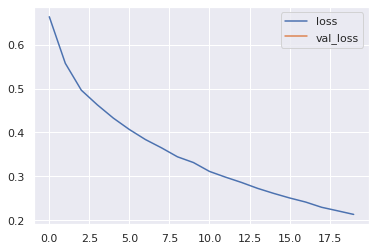

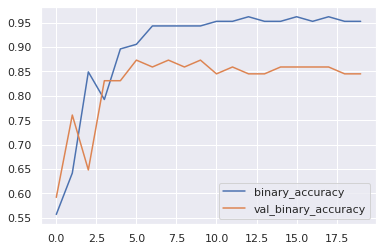

In [ ]:
display_hist(history)  

### Resultados

Podemos então avaliar os resultados do nosso modelo fazendo a predição do conjunto de teste selecionado anteriormente. 

Aqui podemos empregar as métricas usuais do `Scikit-Learn`. A predição, tendo um único neurônio de saída com a função sigmóide (ou logística) devolve um único valor entre $[0, 1]$ e podemos entender esse valor como a chance de ser a classe `1`.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return

In [ ]:
y_pred = model.predict(X_test) > 0.5

print_results(y_test, y_pred)


Matriz de Confusão: 
 [[30 11]
 [ 1 35]]
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83        41
         1.0       0.76      0.97      0.85        36

    accuracy                           0.84        77
   macro avg       0.86      0.85      0.84        77
weighted avg       0.87      0.84      0.84        77

Acuracidade:  0.8441558441558441
